In [1]:
import cv2 as cv2
import os
import matplotlib.pyplot as plt
import easyocr
import pyocr
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import sys
import re

path = "/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/"
path_2010 = path + "2010"

/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/2010/image00006.jpg


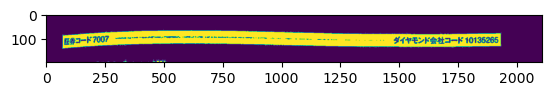

['7007', '10135265']


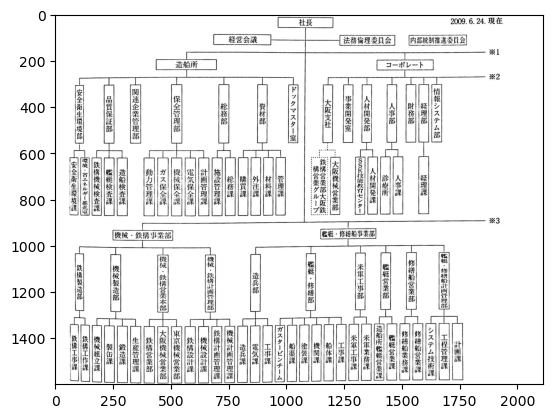

In [2]:
# Choose 2010 of "三井造船"
files = os.listdir(path_2010)
files = [f for f in files if os.path.isfile(os.path.join(path_2010, f))]
files.sort()
file = os.path.join(path_2010, files[5])

# img 
print(file)
img = cv2.imread(file)

# code detection ocr
header = img[50:250, 10:-10]
gray_image = cv2.cvtColor(header, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 245, 255, cv2.THRESH_BINARY)
gray_image_inv = cv2.bitwise_not(binary_image)
plt.imshow(gray_image_inv)
plt.show()

pil_image = Image.fromarray(gray_image_inv)
tools = pyocr.get_available_tools()
tool = tools[0]
txt = tool.image_to_string(
    pil_image,
    lang="jpn",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
filtered_text = re.findall(r'\d+', txt)
print(filtered_text)

# cutting header and edges
header_size = 480
cropped_image = img[header_size:, 10:-10]

# cutting footer
# make figure biniary
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
gray_image_inv = cv2.bitwise_not(gray_image)

# footer detection
row_sums = np.sum(gray_image_inv, axis=1) 
threshold = 100
empty_row_threshold = 30

empty_row_count = 0
footer_start = None
for i, row_sum in enumerate(row_sums):
    if row_sum < threshold:
        empty_row_count += 1
    else:
        empty_row_count = 0
    if empty_row_count >= empty_row_threshold:
        footer_start = i - empty_row_threshold + 1
        break

if footer_start is not None:
    final_image = cropped_image[:footer_start, :]
else:
    final_image = cropped_image

plt.imshow(final_image)
plt.show()

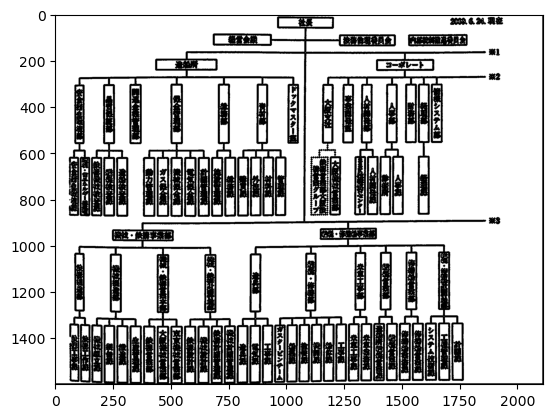

In [4]:
# グレースケールに変換
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
# 二値化（閾値を150に設定）
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

#解説4
# 輪郭を検出
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#解説5
# 全て白の画像を作成
img_blank = np.ones_like(final_image) * 255
# 輪郭だけを描画（黒色で描画）
img_contour_only = cv2.drawContours(img_blank, contours, -1, (0,0,0), 3)

# 描画
plt.imshow(cv2.cvtColor(img_contour_only, cv2.COLOR_BGR2RGB))
plt.show()

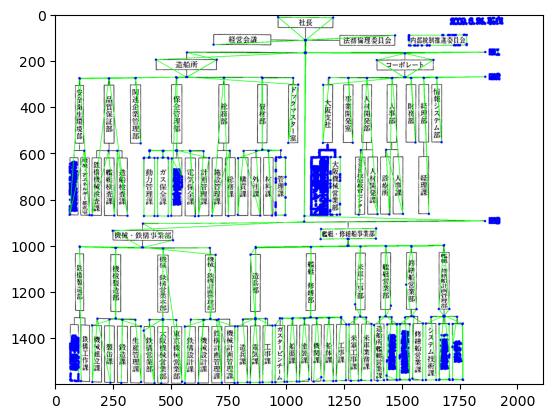

In [25]:
# corners and edges
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = final_image.copy()
for contour in contours:
    epsilon = 0.001 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(image_copy, [approx], 0, (0, 255, 0), 2)
    for point in approx:
        x, y = point[0]
        cv2.circle(image_copy, (x, y), 5, (255,0, 0), -1)

# 結果を表示します
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
len(approx)

151